<a href="https://colab.research.google.com/github/sadikinisaac/diabetes/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Show the shape (number of rows & columns)
df.shape

(768, 9)

In [0]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [6]:
#Show the shape to see if any rows were dropped (number of rows & columns)
df.shape

(768, 9)

In [7]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8] #X = dataset[:,0:8]   #X = df.iloc[:, 0:8] 
# Get all of the rows from the last column
y = dataset[:,8] #y = dataset[:,8]     #y = df.iloc[:, 8]

In [10]:
#Process the data
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
#Split the data into 80% training and 20%

#train_test_split splits arrays or matrices into random train and test subsets. 
#That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [12]:
#Build the model and architecture of the neural network

# The models architechture 3 layers,
# 1st layer with 12 neurons and activation function 'relu'
# 2nd layer with 15 neurons and activation function 'relu'
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 8 the number of features in the data set
model = Sequential([
    Dense(12, activation='relu', input_shape=( 8 ,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# Loss measures how well the model did on training , and then tries to improve on it using the optimizer
model.compile(optimizer='sgd', #Stochastic gradient descent optimizer.
              loss='binary_crossentropy', #Used for binary classification
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
#Train the model

# Split the data into 20% validation data
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=1000, validation_split=0.2)




Train on 491 samples, validate on 123 samples
Epoch 1/1000





491/491 [==============================] - 1s 1ms/step - loss: 0.6882 - acc: 0.6354 - val_loss: 0.6843 - val_acc: 0.6423
Epoch 2/1000
491/491 [==============================] - 0s 36us/step - loss: 0.6852 - acc: 0.6477 - val_loss: 0.6814 - val_acc: 0.6504
Epoch 3/1000
491/491 [==============================] - 0s 41us/step - loss: 0.6825 - acc: 0.6477 - val_loss: 0.6786 - val_acc: 0.6504
Epoch 4/1000
491/491 [==============================] - 0s 42us/step - loss: 0.6800 - acc: 0.6477 - val_loss: 0.6761 - val_acc: 0.6504
Epoch 5/1000
491/491 [==============================] - 0s 38us/step - loss: 0.6778 - acc: 0.6477 - val_loss: 0.6739 - val_acc: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6758 - acc: 0.6477 - val_loss: 0.6719 - val_acc: 0.6504
Epoch 7/1000
491/491 [==============================] - 0s 43us/step - loss: 0.6740 - acc: 0.6477 - val_loss: 0.6701 - val_acc: 0.6504
Ep

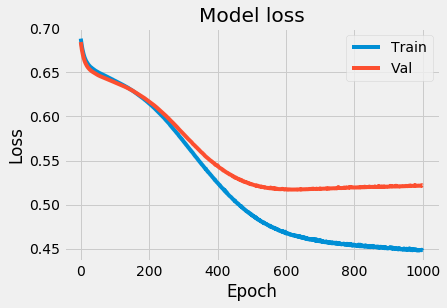

In [15]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

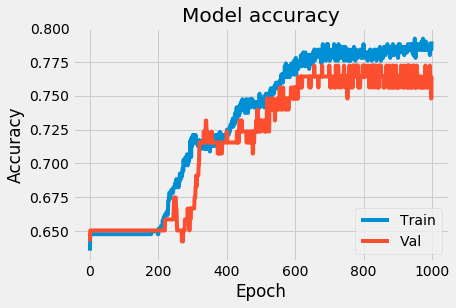

In [16]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [18]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

#Print the predictions
#print('Predicted value: ',model.predict(X_train))

#Print Actual Label
#print('Actual value: ',y_train)

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       398
         1.0       0.74      0.60      0.66       216

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614

Confusion Matrix: 
 [[352  46]
 [ 86 130]]

Accuracy:  0.7850162866449512



In [19]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

#Print the predictions
#print('Predicted value: ',model.predict(X_test))

#Print Actual Label
#print('Actual value: ',y_test)


              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       102
         1.0       0.70      0.67      0.69        52

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix: 
 [[87 15]
 [17 35]]

Accuracy:  0.7922077922077922



In [20]:
#Evaluate the test data set

#The reason why we have the index 1 after the model.evaluate function is because
#the function returns the loss as the first element and the accuracy as the 
#second element. To only output the accuracy, simply access the second element 
#(which is indexed by 1, since the first element starts its indexing from 0).
model.evaluate(X_test, y_test)[1]

154/154 [==============================] - 0s 36us/step


0.7922077937559648